# MSigDB Abstract Wrangling
---

## Process used to collect raw data

1. Open the geneset page (ex. https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/HALLMARK_APOPTOSIS.html)
2. In "Related gene sets", click on (show {X} founder gene sets for this hallmark gene set)
3. Scroll down to where it says, "Download founder gene sets as: gmt | gmx | xml"
4. Download xml
5. Upload it to a folder with the other gene sets 


This XML file will contain all the abstracts from all the founder set associated with the original gene set.

**Note:** This can be done programmatically by iterating through all the pages linked on the MSigDB website, but for the scope of this study (50 genesets) it was faster to just manually download the sets.

## Import necessary packages

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import os

import xmltodict
import json

## Create the dataframe and add paths to XML files

In [4]:
def geneset_names_to_df(names, folder):
    '''
    names: text or csv file containing the names of the gene set used
    folder: path to the folder containing the necessary XML files 
    '''
    genesets = pd.read_csv(names)
    genesets['FILENAME'] = folder + genesets['NAME'] + '_FOUNDERS.v2023.2.Hs.xml'
    return genesets

genesets = geneset_names_to_df('hallmark-names.txt','hallmark-abstracts/')
genesets.describe()

,NAME,FILENAME
count,50,50
unique,50,50
top,HALLMARK_ADIPOGENESIS,hallmark-abstracts/HALLMARK_ADIPOGENESIS_FOUNDERS.v2023.2.Hs.xml
freq,1,1


## Extract only the @DESCRIPTION_BRIEF and @DESCRIPTION_FULL from the XML file

In [60]:
def extract_abstracts_to_dict(filename):
    with open(filename) as file:
        abstracts = xmltodict.parse(file.read())
        counter = 0
        abstract_text = {}
        abstract_text['empty_full'] = 0
        abstract_text['empty_brief'] = 0
        for founder in abstracts['MSIGDB']['GENESET']:
            if founder['@DESCRIPTION_BRIEF']:
                abstract_text[counter] = f'{founder["@DESCRIPTION_BRIEF"]}'
            elif founder['@DESCRIPTION_BRIEF'] == "":
                abstract_text['empty_brief'] += 1
            if founder['@DESCRIPTION_FULL']:
                abstract_text[counter] = f'{founder["@DESCRIPTION_FULL"]}'
            elif founder['@DESCRIPTION_FULL'] == "":
                abstract_text['empty_full'] += 1
            counter += 1
    return abstract_text

def count_founders(filename):
    with open(filename) as file:
        abstracts = xmltodict.parse(file.read())
        counter = 0
        for founder in abstracts['MSIGDB']['GENESET']:
            counter += 1
    return counter

genesets['ABSTRACTS'] = genesets['FILENAME'].apply(extract_abstracts_to_dict)
genesets['ABSTRACT_COUNT'] = genesets['ABSTRACTS'].apply(lambda x: len(x) - 2)
genesets['NO_ABSTRACT_BRIEF'] = genesets['ABSTRACTS'].apply(lambda x: x['empty_brief'])
genesets['NO_ABSTRACT_FULL'] = genesets['ABSTRACTS'].apply(lambda x: x['empty_full'])
genesets['ABSTRACT_COUNT_FULL'] = genesets['ABSTRACT_COUNT'] - genesets['NO_ABSTRACT_FULL']

In [61]:
abstracts_adipogenesis = genesets[genesets['NAME'] == 'HALLMARK_ADIPOGENESIS']['ABSTRACTS'][0]
#abstracts_adipogenesis

In [62]:
pd.set_option('max_colwidth', 400)
genesets[['NAME','ABSTRACTS','ABSTRACT_COUNT','NO_ABSTRACT_BRIEF','NO_ABSTRACT_FULL', 'ABSTRACT_COUNT_FULL']]

,NAME,ABSTRACTS,ABSTRACT_COUNT,NO_ABSTRACT_BRIEF,NO_ABSTRACT_FULL,ABSTRACT_COUNT_FULL
0,HALLMARK_ADIPOGENESIS,"{'empty_full': 4, 'empty_brief': 0, 0: 'Invasive ductal carcinomas (IDCs) and invasive lobular carcinomas (ILCs) are the two major pathological types of breast cancer. Epidemiological and histoclinical data suggest biological differences, but little is known about the molecular alterations involved in ILCs. We undertook a comparative large-scale study by both array-compared genomic hybridizati...",36,0,4,32
1,HALLMARK_ALLOGRAFT_REJECTION,"{'empty_full': 149, 'empty_brief': 0, 0: 'Although glioblastomas show the same histologic phenotype, biological hallmarks such as growth and differentiation properties vary considerably between individual cases. To investigate whether different subtypes of glioblastomas might originate from different cells of origin, we cultured tumor cells from 22 glioblastomas under medium conditions favorin...",189,0,149,40
2,HALLMARK_ANDROGEN_RESPONSE,"{'empty_full': 3, 'empty_brief': 0, 0: 'Genes having at least one occurence of the motif ACGCACA in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-210 (v7.1 miRBase).', 1: 'We combined large-scale mRNA expression analysis and gene mapping to identify genes and loci that control hematopoietic stem cell (HSC) function. We me...",8,0,3,5
3,HALLMARK_ANGIOGENESIS,"{'empty_full': 10, 'empty_brief': 0, 0: 'Binding to a carbohydrate, which includes monosaccharides, oligosaccharides and polysaccharides as well as substances derived from monosaccharides by reduction of the carbonyl group (alditols), by oxidation of one or more hydroxy groups to afford the corresponding aldehydes, ketones, or carboxylic acids, or by replacement of one or more hydroxy group(s)...",14,0,10,4
4,HALLMARK_APICAL_JUNCTION,"{'empty_full': 28, 'empty_brief': 0, 0: 'Genes annotated by the GO term GO:0051017. The assembly of actin filament bundles; actin filaments are on the same axis but may be oriented with the same or opposite polarities and may be packed with different levels of tightness.', 1: 'Chemotherapy with the alkylating agent BCNU (1,3-bis (2-chloroethyl)-1-nitrosourea) is the most commonly used chemothe...",37,0,28,9
5,HALLMARK_APICAL_SURFACE,"{'empty_full': 11, 'empty_brief': 0, 0: 'Genes annotated by the GO term GO:0044463. Any constituent part of a cell projection, a prolongation or process extending from a cell, e.g. a flagellum or axon.', 1: 'Genes in cytogenetic band chr6q', 2: 'Any process that results in a change in state or activity of a cell or an organism (in terms of movement, secretion, enzyme production, gene expressio...",12,0,11,1
6,HALLMARK_APOPTOSIS,"{'empty_full': 44, 'empty_brief': 0, 0: 'Immunoglobulin light chain amyloidosis (AL) is characterized by a clonal expansion of plasma cells within the bone marrow. Gene expression analysis was used to identify a unique molecular profile for AL using enriched plasma cells (CD138+) from the bone marrow of 24 patients with AL and 28 patients with multiple myeloma (MM) and 6 healthy controls. Clas...",80,0,44,36
7,HALLMARK_BILE_ACID_METABOLISM,"{'empty_full': 23, 'empty_brief': 0, 0: 'Genes in cytogenetic band chr11p', 1: 'Genes in cytogenetic band chr15q', 2: 'The chemical reactions and pathways involving bile acids, a group of steroid carboxylic acids occurring in bile, where they are present as the sodium salts of their amides with glycine or taurine. [GOC:go_curators]', 3: 'The chemical reactions and pathways involving any hormon...",28,0,23,5
8,HALLMARK_CHOLESTEROL_HOMEOSTASIS,"{'empty_full': 4, 'empty_brief': 0, 0: 'Fibroblast Growth Factor Receptor-1 (FGFR1) is commonly overexpressed in advanced prostate cancer (PCa). To investigate causality, we utilized an inducible FGFR1 (iFGFR1) prostate mouse model. Activation of iFGFR1 with chemical inducers of dimerization (CID) led to highly synchronous, step-wise progression to adenocarcinoma 

In [76]:
total_founder_abs = genesets['ABSTRACT_COUNT'].sum()
total_founders_abs_full = genesets['ABSTRACT_COUNT_FULL'].sum()
sets_brief_only = genesets[genesets['ABSTRACT_COUNT_FULL'] <= 5]['ABSTRACT_COUNT_FULL'].count()

print(f'''
Total number of founder abstracts: {total_founder_abs}
Average number of founder abstracts: {total_founder_abs/50}
Total number of full founder abstracts: {total_founders_abs_full}
Average number of full founder abstracts: {total_founders_abs_full/50}
Number of hallmark sets <6 full founder abstracts: {sets_brief_only}
''')


Total number of founder abstracts: 4809
Average number of founder abstracts: 96.18
Total number of full founder abstracts: 2526
Average number of full founder abstracts: 50.52
Number of hallmark sets <6 full founder abstracts: 10



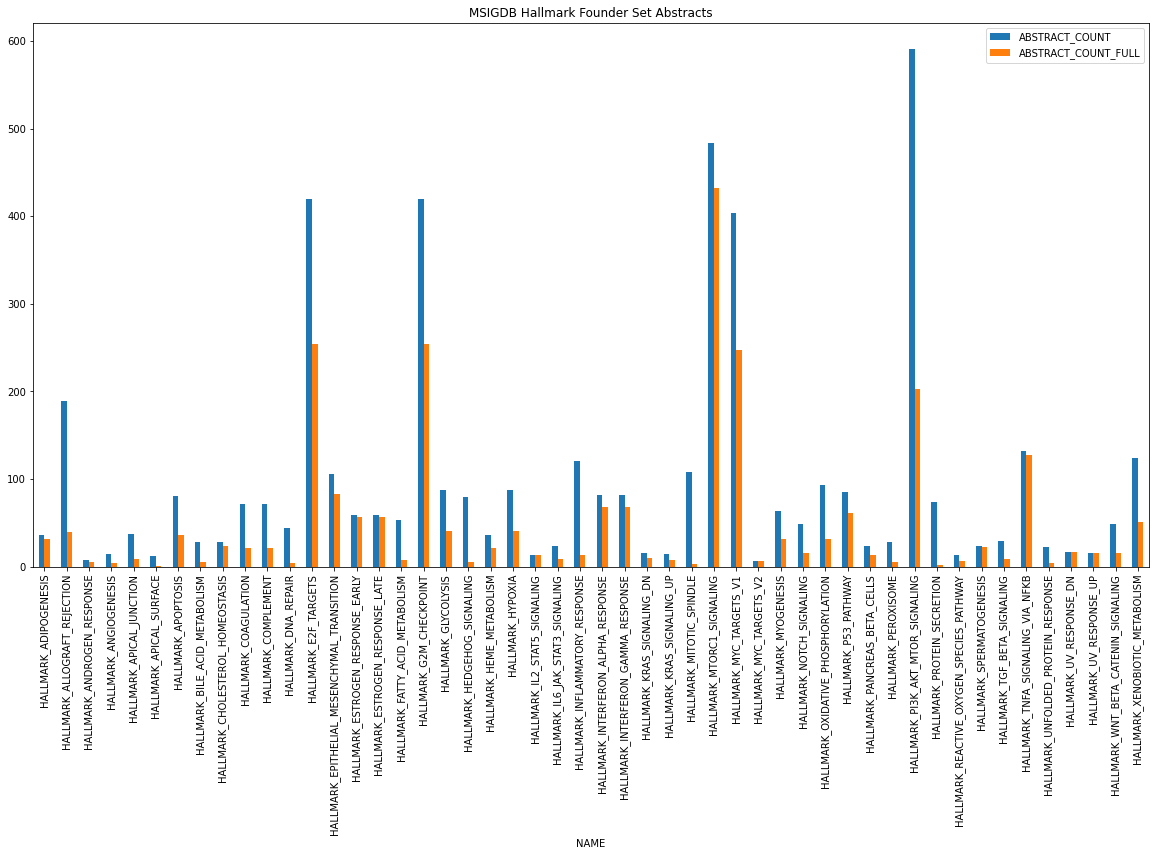

In [59]:
import matplotlib.pyplot as plt

genesets[['NAME','ABSTRACT_COUNT','ABSTRACT_COUNT_FULL']].plot.bar(title="MSIGDB Hallmark Founder Set Abstracts", x='NAME', figsize = (20, 10), linewidth='20')
plt.show() 